In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [69]:
df=pd.read_csv('/content/sample_data/Classified Data.txt')
df.head(10)

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
5,5,0.833928,1.523302,1.104743,1.021139,1.107377,1.010930,1.279538,1.280677,0.510350,1.528044,0
6,6,0.944705,1.251761,1.074885,0.286473,0.996440,0.428860,0.910805,0.755305,1.111800,1.110842,0
7,7,0.816174,1.088392,0.895343,0.243860,0.943123,1.045131,1.146536,1.341886,1.225324,1.425784,0
8,8,0.776551,1.463812,0.783825,0.337278,0.742215,1.072756,0.880300,1.312951,1.118165,1.225922,0
9,9,0.772280,0.515111,0.891596,0.940862,1.430568,0.885876,1.205231,0.596858,1.542580,0.981879,1


In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [71]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Unnamed: 0,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-1.730320,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.726856,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-1.723391,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,-1.719927,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-1.716463,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_features,df['TARGET CLASS'], test_size=0.30)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [74]:
pre=knn.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pre))
print(classification_report(y_test,pre))

[[129  13]
 [ 12 146]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       142
           1       0.92      0.92      0.92       158

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [75]:
error_rate=[]
for i in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pre=knn.predict(x_test)
  error_rate.append(np.mean(pre!=y_test))

Text(0, 0.5, 'Error Rate')

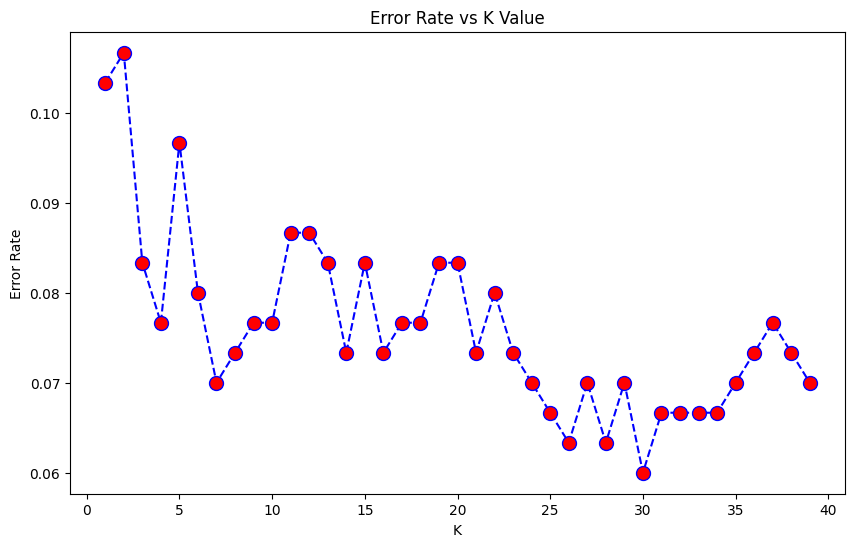

In [76]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

     colored_sputum  cough  fever  headache class
0               1.0    3.5    9.4       3.0   flu
1               1.0    3.4    8.4       4.0   flu
2               1.0    3.3    7.3       3.0   flu
3               1.0    3.4    9.5       4.0   flu
4               1.0    2.0    8.0       3.5   flu
..              ...    ...    ...       ...   ...
145             0.0    1.0    4.2       2.3  cold
146             0.5    2.5    2.0       1.7  cold
147             0.0    1.0    3.2       2.0  cold
148             0.4    3.4    2.4       2.3  cold
149             0.0    1.0    3.1       1.8  cold

[150 rows x 5 columns]


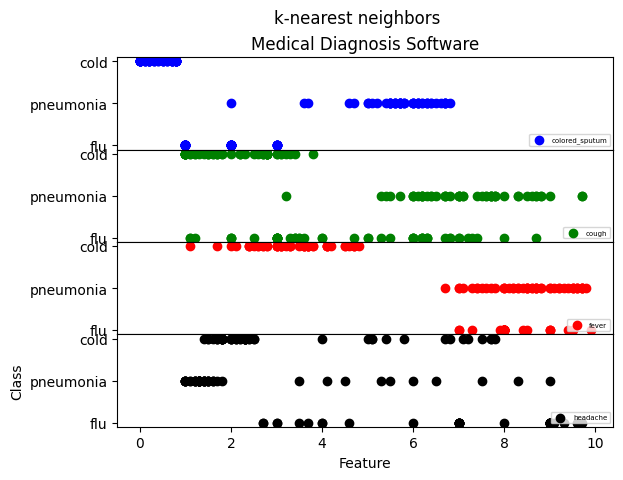

In [80]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv("/content/sample_data/D1.csv")
print (df)
# KNN classification labels
X = df.loc[:,'colored_sputum':'headache']
Y = df.loc[:,'class']
# Trains the model
knn = KNeighborsClassifier()
knn.fit(X,Y)
#Display the trained model's output
df = pd.read_csv("/content/sample_data/D1.csv")
# Plotting the relation of each feature with each class
figure,(sub1,sub2,sub3,sub4)=plt.subplots(4,sharex=True,sharey=True)
plt.suptitle('k-nearest neighbors')
plt.xlabel('Feature')
plt.ylabel('Class')
X = df.loc[:,'colored_sputum']
Y = df.loc[:,'class']
sub1.scatter(X, Y,color='blue',label='colored_sputum')
sub1.legend(loc=4, prop={'size': 5})
sub1.set_title('Medical Diagnosis Software')
X = df.loc[:,'cough']
Y = df.loc[:,'class']
sub2.scatter(X, Y,color='green',label='cough')
sub2.legend(loc=4, prop={'size': 5})
X = df.loc[:,'fever']
Y = df.loc[:,'class']
sub3.scatter(X, Y,color='red',label='fever')
sub3.legend(loc=4, prop={'size': 5})
X = df.loc[:,'headache']
Y = df.loc[:,'class']
sub4.scatter(X, Y,color='black',label='headache')
sub4.legend(loc=4, prop={'size': 5})
figure.subplots_adjust(hspace=0)
plt.show()
#Evaluating the symptoms on a scale of 1 to 9

#@title Evaluation form
colored_sputum =  5#@param {type:"integer"}
cough=8#@param {type:"integer"}
fever=9#@param {type:"integer"}
headache=1#@param {type:"integer"}